## Ulises Cabrera González

# Caso de estudio 1: IMDB 5000 Movie Dataset

El objetivo de este caso de estudio es demostrar la exploración de datos, limpieza y descubrimiento de insights.

## Sobre el dataset

IMBD es una base de datos online de información relacionada a películas, series de televisión, videos, entre otros. El dataset contiene información de cerca de 5000 titulos y metadatos que van desde el director, actores hasta scores de críticos e impacto en redes sociales 

Variable Name 	Description
movie_title 	Title of the Movie
duration 	Duration in minutes
director_name 	Name of the Director of the Movie
director_facebook_likes 	Number of likes of the Director on his Facebook Page
actor_1_name 	Primary actor starring in the movie
actor_1_facebook_likes 	Number of likes of the Actor_1 on his/her Facebook Page
actor_2_name 	Other actor starring in the movie
actor_2_facebook_likes 	Number of likes of the Actor_2 on his/her Facebook Page
actor_3_name 	Other actor starring in the movie
actor_3_facebook_likes 	Number of likes of the Actor_3 on his/her Facebook Page
num_user_for_reviews 	Number of users who gave a review
num_critic_for_reviews 	Number of critical reviews on imdb
num_voted_users 	Number of people who voted for the movie
cast_total_facebook_likes 	Total number of facebook likes of the entire cast of the movie
movie_facebook_likes 	Number of Facebook likes in the movie page
plot_keywords 	Keywords describing the movie plot
facenumber_in_poster 	Number of the actor who featured in the movie poster
color 	Film colorization. ‘Black and White’ or ‘Color’
genres 	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
title_year 	The year in which the movie is released (1916:2016)
language 	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
country 	Country where the movie is produced
content_rating 	Content rating of the movie
aspect_ratio 	Aspect ratio the movie was made in
movie_imdb_link 	IMDB link of the movie
gross 	Gross earnings of the movie in Dollars
budget 	Budget of the movie in Dollars
imdb_score 	IMDB Score of the movie on IMDB

In [57]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set_style("darkgrid")

In [68]:
#### Carga de datos
data = pd.read_csv("movie_metadata.csv")


In [69]:
#### Conociendo mis datos: tamaño, datos, media, tipos de datos
data.shape

(5043, 28)

In [70]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [71]:
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [72]:
data.movie_title=data.movie_title.apply(lambda x: x.strip('\xa0'))
data.movie_title.tolist()

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'Star Wars: Episode VII - The Force Awakens\xa0            ',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinctio

In [73]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [74]:
#Verifico los datos faltantes de los dataset
(pd.isnull(data).sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [75]:
data = data.dropna(axis=0)

col_0       NÚMERO DE PELÍCULAS
title_year                     
2006                        189
2007                        152
2008                        182
2009                        182
2010                        168
2011                        168
2012                        158
2013                        163
2014                        145
2015                        128
2016                         59


Text(0.5, 1.0, 'GRÁFICA DE CANTIDAD DE PELÍCULAS PRODUCIDAS DESDE 2006 HASTA 2016')

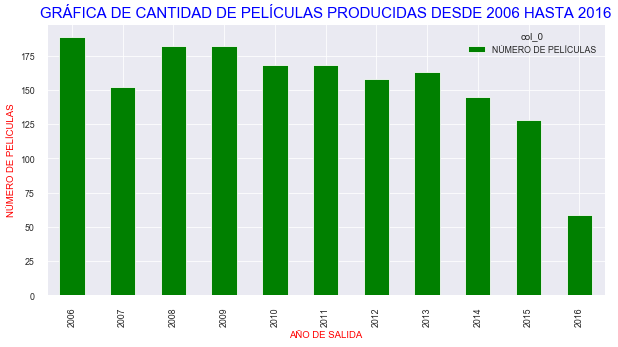

In [76]:
#### DETERMINA LA CANTIDAD DE PELICULAS PRODUCIDAS POR CADA AÑO DE 2006 A 2016
peliculas_año=pd.crosstab(index=data["title_year"], columns="NÚMERO DE PELÍCULAS")
pelis_2016 = peliculas_año.loc[[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]]
print(pelis_2016)


#### GRÁFICA
pelis_2016.plot(kind="bar",color="green",figsize=(10,5))
plt.xlabel("AÑO DE SALIDA", color="red")
plt.ylabel("NÚMERO DE PELÍCULAS", color="red")
plt.title("GRÁFICA DE CANTIDAD DE PELÍCULAS PRODUCIDAS DESDE 2006 HASTA 2016", fontsize=15, color="blue")

In [77]:
#### OBTENER TOP 20 GANANCIAS TOTALES POR DIRECTOR
ganancias_director = pd.crosstab(data["director_name"], "ganancia", values=data["gross"], aggfunc="sum")
ganancias_director.sort_values(by="ganancia", ascending=False).iloc[:20]

col_0,ganancia
director_name,
Steven Spielberg,4.114233e+09
Peter Jackson,2.289968e+09
Michael Bay,2.231243e+09
Tim Burton,2.071275e+09
Sam Raimi,2.049549e+09
James Cameron,1.948126e+09
Christopher Nolan,1.813228e+09
George Lucas,1.741418e+09
Joss Whedon,1.730887e+09


In [78]:
#### PELÍCULAS MÁS POPULARES EN FACEBOOK EN EUA
data_pais=data[data["country"]=="USA"]
data_pais[["movie_title","movie_facebook_likes"]].sort_values(by="movie_facebook_likes", ascending=False).head()

,movie_title,movie_facebook_likes
96,Interstellar,349000
296,Django Unchained,199000
10,Batman v Superman: Dawn of Justice,197000
179,The Revenant,190000
97,Inception,175000


In [79]:
### ¿CUÁLES SON LAS PELÍCULAS DEL GÉNERO SCI-FI DE MÁS BAJO PRESUPUESTO?
data_scifi=data[data['genres'].str.contains("Sci-Fi")]
pres_movie=pd.crosstab(data_scifi["movie_title"], columns="presupuesto", values=data["budget"], aggfunc="sum")
pres_movie.sort_values("presupuesto",ascending=True).head(10)

col_0,presupuesto
movie_title,
Primer,7000.0
The Lost Skeleton of Cadavra,40000.0
Another Earth,100000.0
"The Beast from 20,000 Fathoms",210000.0
I Married a Strange Person!,250000.0
Cube,365000.0
Monsters,500000.0
Kingdom of the Spiders,500000.0
Stake Land,650000.0


In [80]:
##¿CUÁLES SON LOS ACTORES QUE EN PROMEDIO HAN PARTICIPADO EN LAS PELÍCULAS MÁS LARGAS?
promedio_actor1 = pd.crosstab(data["actor_1_name"], 
            columns="duracion", values=data["duration"], aggfunc="mean").sort_values("duracion",ascending=False).head(10)
promedio_actor2 = pd.crosstab(data["actor_2_name"], 
            columns="duracion", values=data["duration"], aggfunc="mean").sort_values("duracion",ascending=False).head(10)
promedio_actor3 = pd.crosstab(data["actor_3_name"], 
            columns="duracion", values=data["duration"], aggfunc="mean").sort_values("duracion",ascending=False).head(10)
print(promedio_actor1)
print("")
print(promedio_actor2)
print("")
print(promedio_actor3)

col_0                 duracion
actor_1_name                  
Sarunyu Wongkrachang     300.0
Jürgen Prochnow          293.0
Billy Campbell           280.0
Mary McDonnell           236.0
Claude Rains             227.0
Hattie McDaniel          226.0
Joe Cocker               215.0
Matt Frewer              215.0
Sally Kirkland           206.0
Takashi Shimura          202.0

col_0                 duracion
actor_2_name                  
Jesse Borrego            330.0
Chatchai Plengpanich     300.0
Martin Semmelrogge       293.0
Bruce Boxleitner         280.0
Richard Burton           251.0
Michael Spears           236.0
José Ferrer              227.0
George Reeves            226.0
Carroll Baker            225.0
Henry Thomas             220.0

col_0                 duracion
actor_3_name                  
Mai Charoenpura          300.0
Herbert Grönemeyer       293.0
John Castle              280.0
James Patrick Stuart     271.0
Roddy McDowall           251.0
Thomas Mitchell          226.0
Isabel

### ANÁLISIS PARA DETERMINAR A QUÉ DIRECTOR CONTRATARÍA SI QUISIERA PRODUCIR UNA PELÍCULA DOCUMENTAL

In [82]:
#PRIMERO FILTRO TODAS LAS PELÍCULAS CON EL GÉNERO DOCUMENTAL CON LA SIGUIENTE FUNCION

data_documental = data[data['genres'].str.contains("Documentary")]
data_documental.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
504,Color,Jacques Perrin,113.0,104.0,63.0,7.0,Jacques Perrin,67.0,19406406.0,Documentary|Drama,...,42.0,French,France,G,40000000.0,2009.0,63.0,7.8,2.35,0
741,Color,Kenny Ortega,136.0,111.0,197.0,6.0,Mekia Cox,433.0,71844424.0,Documentary|Music,...,223.0,English,USA,PG,60000000.0,2009.0,208.0,7.3,1.78,0
2160,Color,Jeff Tremaine,156.0,101.0,79.0,218.0,Steve-O,608.0,117224271.0,Action|Comedy|Documentary,...,81.0,English,USA,R,20000000.0,2010.0,362.0,7.1,1.78,0
2834,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
2946,Color,Dan Cutforth,68.0,93.0,4.0,8.0,Ashley Ashida Dixon,28.0,25240988.0,Documentary|Music,...,50.0,English,USA,PG,12000000.0,2012.0,9.0,5.9,1.85,0


In [83]:
#DETECTO A LOS DIRECTORES QUE MAS GANANCIAS HAN GENERADO EN TOTAL Y EN PROMEDIO EN ESTE TIPO DE PELÍCULAS
#ADEMÁS DE HACER UNA COMPARACIÓN DE VER QUIENES COINCIDEN EN LAS 2 TABLAS

director_gross_total=pd.crosstab(data_documental["director_name"], "GANANCIA PROMEDIO", values=data_documental["gross"], aggfunc="mean")
print(director_gross_total.sort_values(by="GANANCIA PROMEDIO", ascending=False).head(10))
print("")
director_gross_mean=pd.crosstab(data_documental["director_name"], "GANANCIA TOTAL", values=data_documental["gross"], aggfunc="sum")
print(director_gross_mean.sort_values(by="GANANCIA TOTAL", ascending=False).head(10))

col_0            GANANCIA PROMEDIO
director_name                     
Jeff Tremaine          90746084.00
Luc Jacquet            77413017.00
Jon M. Chu             73000942.00
Kenny Ortega           71844424.00
Michael Moore          42890046.75
Spike Lee              38168022.00
Dinesh D'Souza         33349949.00
Leslie Small           32230907.00
Dan Cutforth           25240988.00
Morgan Spurlock        20201371.00

col_0            GANANCIA TOTAL
director_name                  
Jeff Tremaine       181492168.0
Michael Moore       171560187.0
Luc Jacquet          77413017.0
Jon M. Chu           73000942.0
Kenny Ortega         71844424.0
Morgan Spurlock      40402742.0
Spike Lee            38168022.0
Dinesh D'Souza       33349949.0
Leslie Small         32230907.0
Dan Cutforth         25240988.0


In [84]:
#GUARDO EN UNA VARIABLE LOS DIRECTORES QUE COINCIDAN EN LAS 2 LISTAS, CON ELLO HACIENDO UN BALANCE 

lista_directores=["Jeff Tremaine", "Luc Jacquet", "Jon M. Chu", 
                  "Kenny Ortega", "Spike Lee", "Michael Moore", "Dinesh D'Souza"]

In [85]:
#AHORA SACO EL PROMEDIO DE LOS SCORES EN IMDB DE LOS DIRECTORES SELECCIONADOS PREVIAMENTE

score=pd.crosstab(data_documental["director_name"],"imdb score promedio", values=data["imdb_score"], aggfunc="mean")
score.loc[lista_directores].sort_values("imdb score promedio", ascending=False)

col_0,imdb score promedio
director_name,
Michael Moore,7.75
Luc Jacquet,7.60
Kenny Ortega,7.30
Jeff Tremaine,6.85
Spike Lee,6.60
Dinesh D'Souza,5.10
Jon M. Chu,1.60


Text(0.5, 0, 'DIRECTOR')

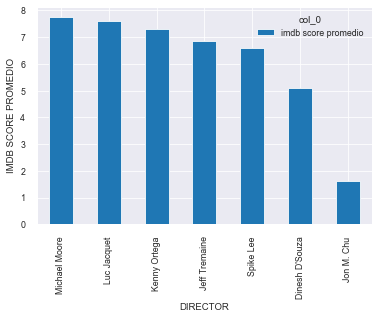

In [86]:
#AHÍ SE PUEDE OBSERVAR QUE MICHAEL MOORE ES QUIEN POSEE EL PROMEDIO MÁS ALTO DE ELLOS
#POR LO TANTO CONTRATARLO SIGNIFICARÍA EXCELENTE GANANCIA EN PROMEDIO PERO SOBRETODO CALIDAD EN EL DOCUMENTAL

score.loc[lista_directores].sort_values("imdb score promedio", ascending=False).plot(kind="bar")
plt.ylabel("IMDB SCORE PROMEDIO")
plt.xlabel("DIRECTOR")

In [88]:
data.to_csv("movies.csv", index=False)